In [1]:
import pandas as pd

eos = pd.read_excel('/home/kshipra/work/major/ml experiments/data/manually_combined.xlsx', sheet_name='all_stacked_eos')
sentinel = pd.read_excel('/home/kshipra/work/major/ml experiments/data/manually_combined.xlsx', sheet_name='all_stacked_sentinel')

len(eos), len(sentinel)

(747, 796)

In [2]:
from model_experiments import ANNExperimentsV1

2025-08-27 10:21:48.385831: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Training set: 504 samples
Validation set: 168 samples
Test set: 75 samples

Test Loss (MSE): 146.0237
Test MAE: 10.0790
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

Additional Metrics:
MSE: 146.0237
R² Score: -0.0490
RMSE: 12.0840


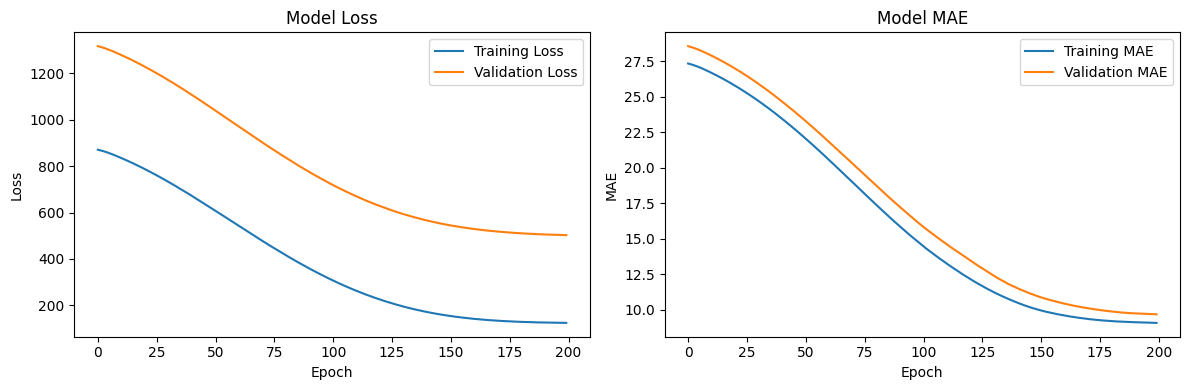

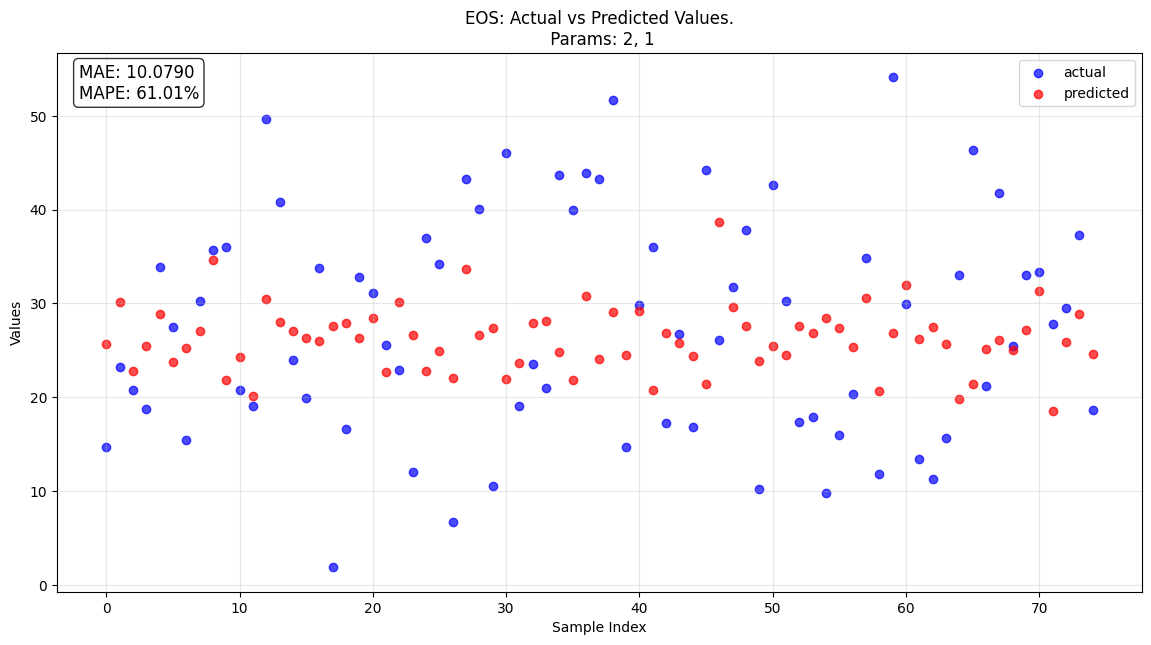

In [2]:
from model_experiments import ANNExperimentsV1
import tensorflow as tf

exp1 = ANNExperimentsV1(eos, features=['HH', 'HV'], satellite='EOS')

# Build the ANN model with non-linearity
model = tf.keras.Sequential([
    # Input layer
    tf.keras.Input(shape=(2, )),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(1)
])

exp1.run_experiment(model, optimizer='adam', epochs=200, batch_size=32, verbose=0, model_param_string='2, 1')

Training set: 504 samples
Validation set: 168 samples
Test set: 75 samples

Test Loss (MSE): 144.6150
Test MAE: 9.9960
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

Additional Metrics:
MSE: 144.6150
R² Score: -0.0389
RMSE: 12.0256


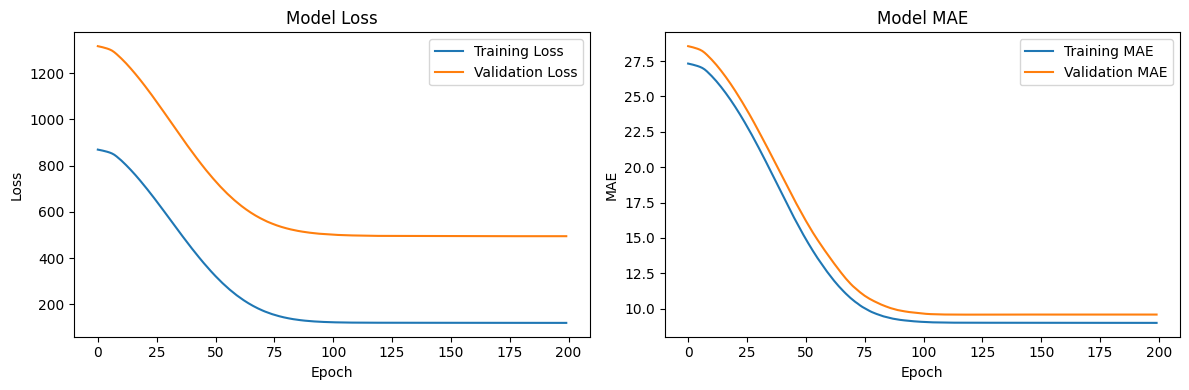

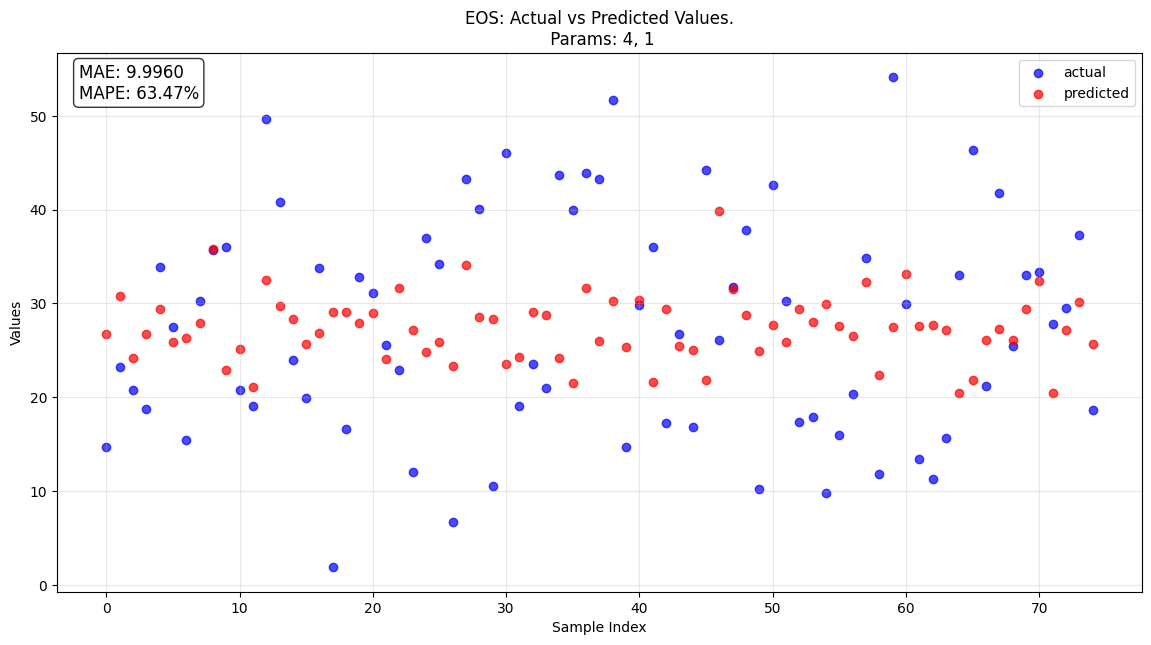

In [3]:
# Build the ANN model with non-linearity
model = tf.keras.Sequential([
    # Input layer
    tf.keras.Input(shape=(2, )),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)
])

ANNExperimentsV1(eos, features=['HH', 'HV'], satellite='EOS').run_experiment(model, optimizer='adam', epochs=200, batch_size=32, 
                                                                             verbose=0, model_param_string='4, 1')

Training set: 504 samples
Validation set: 168 samples
Test set: 75 samples

Test Loss (MSE): 142.8924
Test MAE: 10.0311
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

Additional Metrics:
MSE: 142.8924
R² Score: -0.0265
RMSE: 11.9538


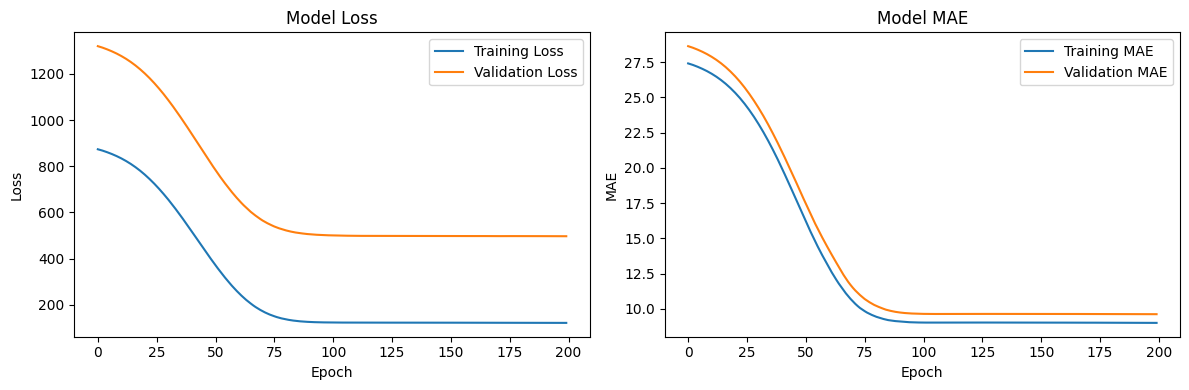

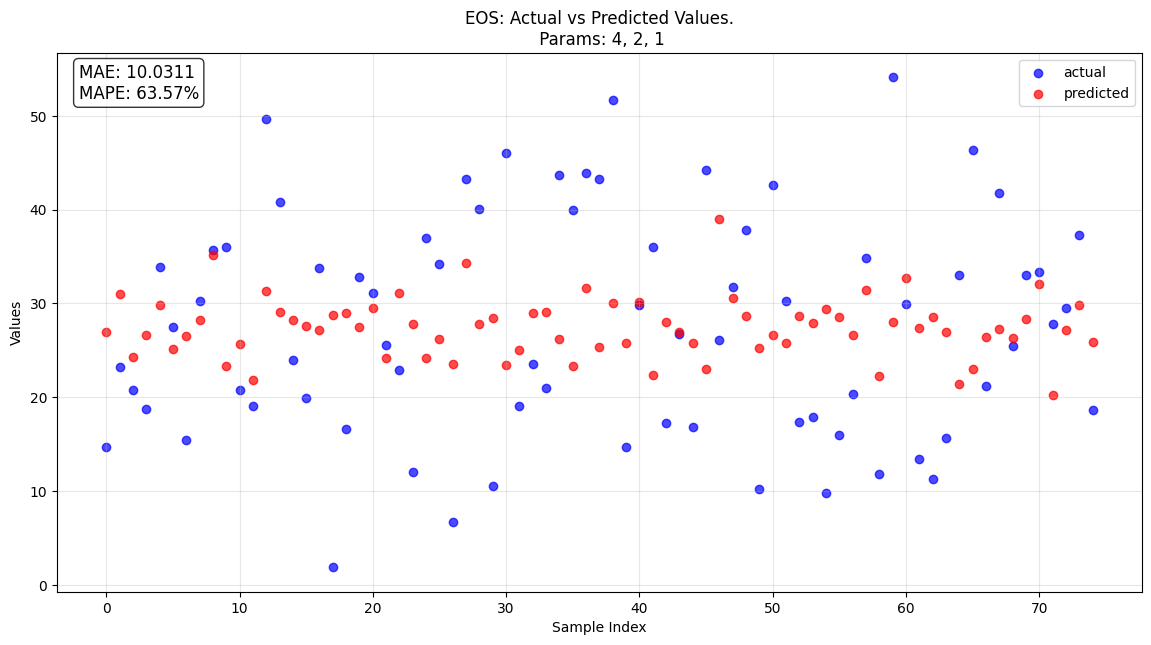

In [5]:
# Build the ANN model with non-linearity
model = tf.keras.Sequential([
    # Input layer
    tf.keras.Input(shape=(2, )),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(1)
])

ANNExperimentsV1(eos, features=['HH', 'HV'], satellite='EOS').run_experiment(model, optimizer='adam', epochs=200, batch_size=32, 
                                                                             verbose=0, model_param_string='4, 2, 1')

Training set: 504 samples
Validation set: 168 samples
Test set: 75 samples

Test Loss (MSE): 143.9114
Test MAE: 9.8813
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

Additional Metrics:
MSE: 143.9114
R² Score: -0.0338
RMSE: 11.9963


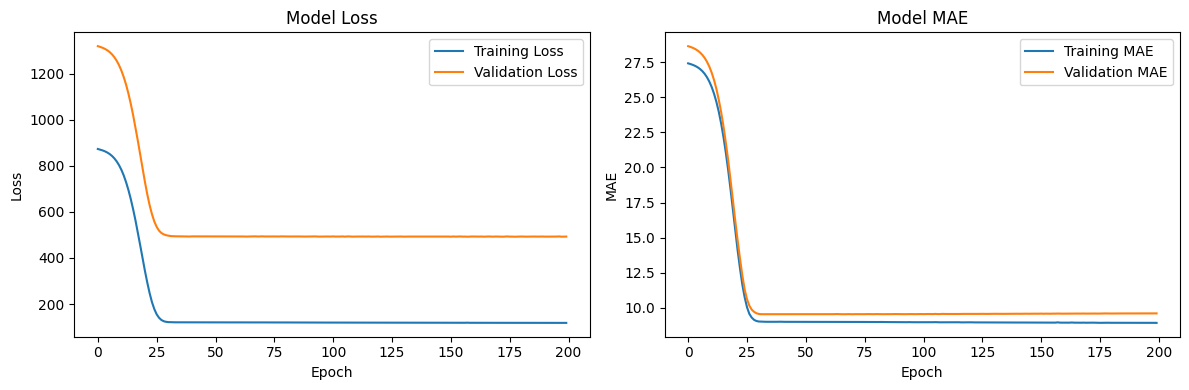

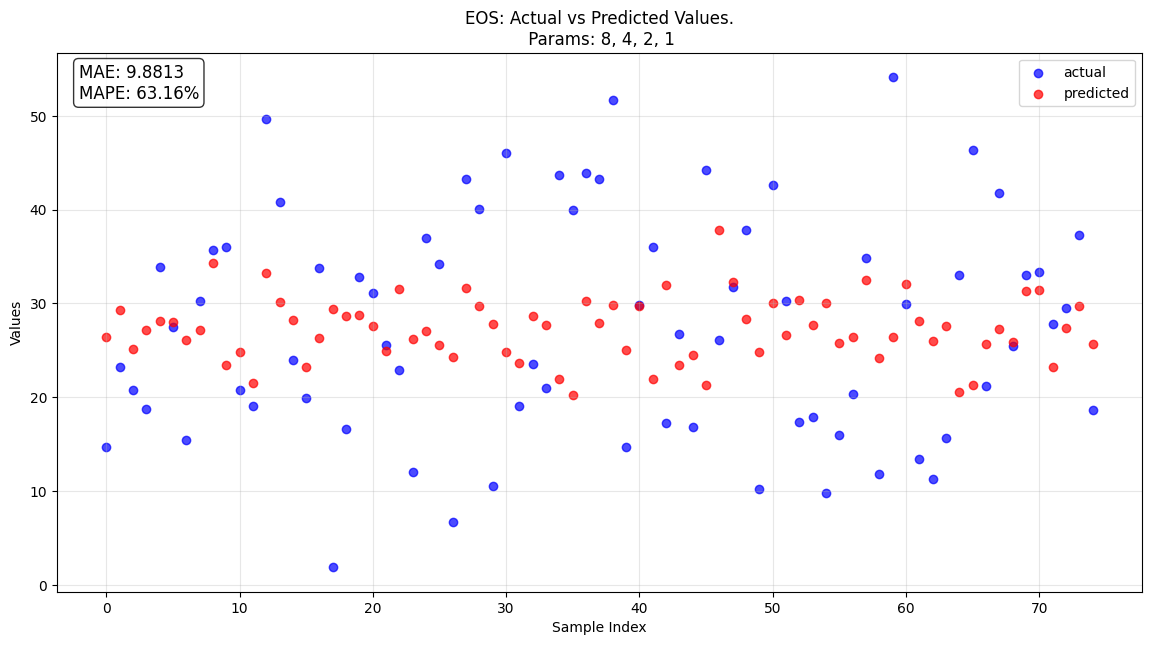

In [6]:
# Build the ANN model with non-linearity
model = tf.keras.Sequential([
    # Input layer
    tf.keras.Input(shape=(2, )),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(1)
])

ANNExperimentsV1(eos, features=['HH', 'HV'], satellite='EOS').run_experiment(model, optimizer='adam', epochs=200, batch_size=32, 
                                                                             verbose=0, model_param_string='8, 4, 2, 1')

Training set: 537 samples
Validation set: 179 samples
Test set: 80 samples

Test Loss (MSE): 121.1680
Test MAE: 8.5231
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

Additional Metrics:
MSE: 121.1680
R² Score: -0.0983
RMSE: 11.0076


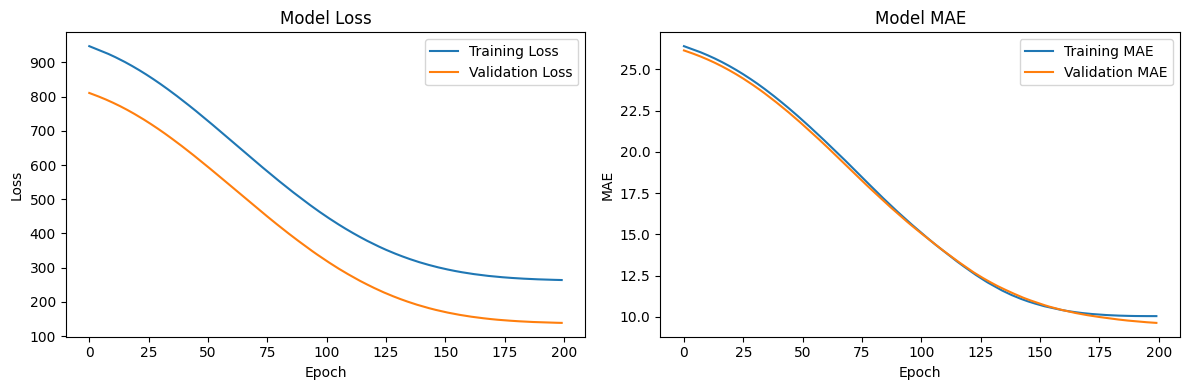

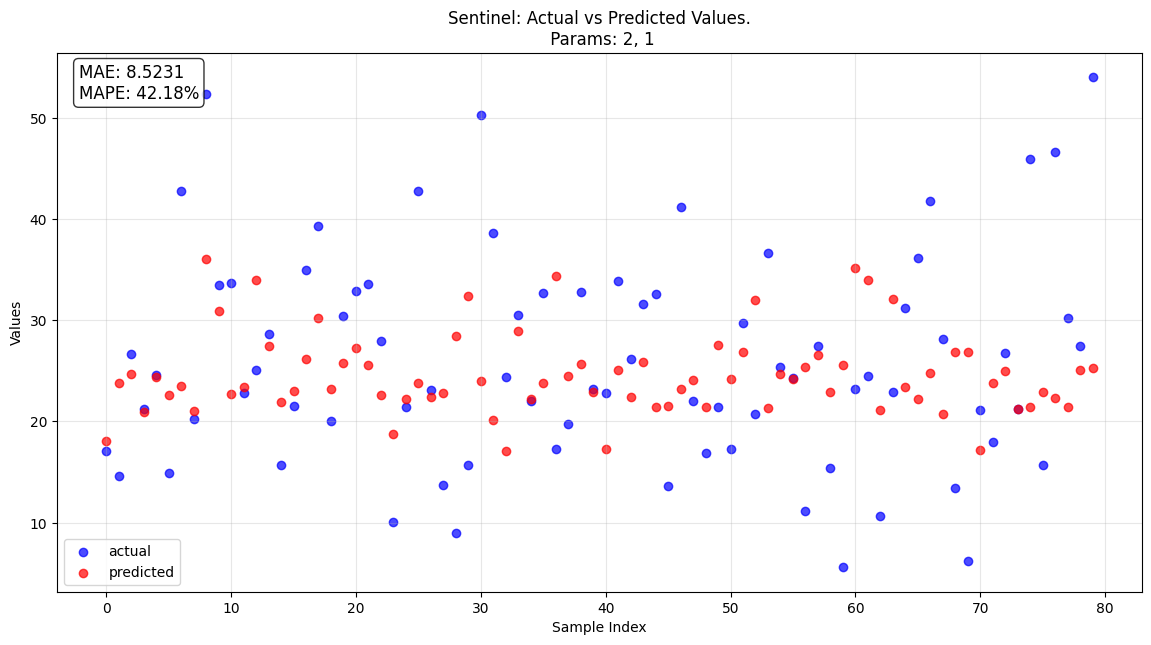

In [7]:
# Build the ANN model with non-linearity
model = tf.keras.Sequential([
    # Input layer
    tf.keras.Input(shape=(2, )),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(1)
])

ANNExperimentsV1(sentinel, features=['VH', 'VV'], satellite='Sentinel').run_experiment(model, optimizer='adam', epochs=200, batch_size=32, 
                                                                             verbose=0, model_param_string='2, 1')

Training set: 537 samples
Validation set: 179 samples
Test set: 80 samples

Test Loss (MSE): 115.8380
Test MAE: 8.4440
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

Additional Metrics:
MSE: 115.8380
R² Score: -0.0500
RMSE: 10.7628


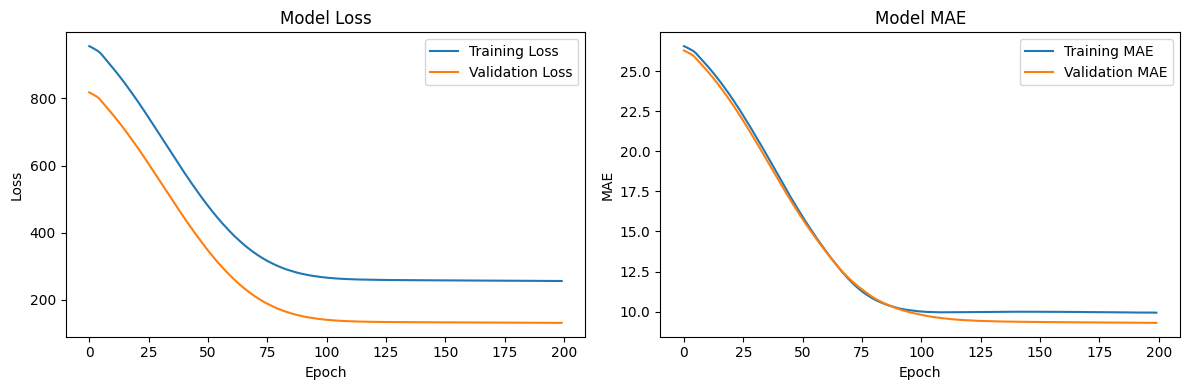

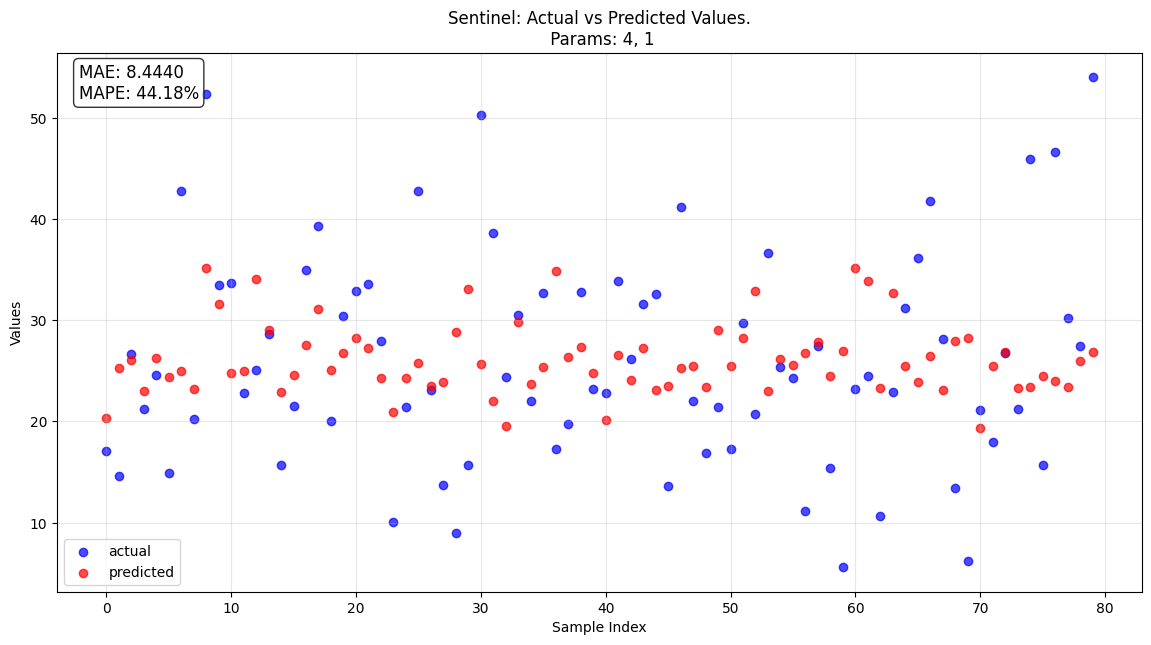

In [5]:
# Build the ANN model with non-linearity
model = tf.keras.Sequential([
    # Input layer
    tf.keras.Input(shape=(2, )),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)
])

ANNExperimentsV1(sentinel, features=['VH', 'VV'], satellite='Sentinel').run_experiment(model, optimizer='adam', epochs=200, batch_size=32, 
                                                                             verbose=0, model_param_string='4, 1')

2025-08-27 10:40:50.053022: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Training set: 537 samples
Validation set: 179 samples
Test set: 80 samples

Test Loss (MSE): 626.8284
Test MAE: 22.7268
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

Additional Metrics:
MSE: 626.8284
R² Score: -4.6819
RMSE: 25.0365


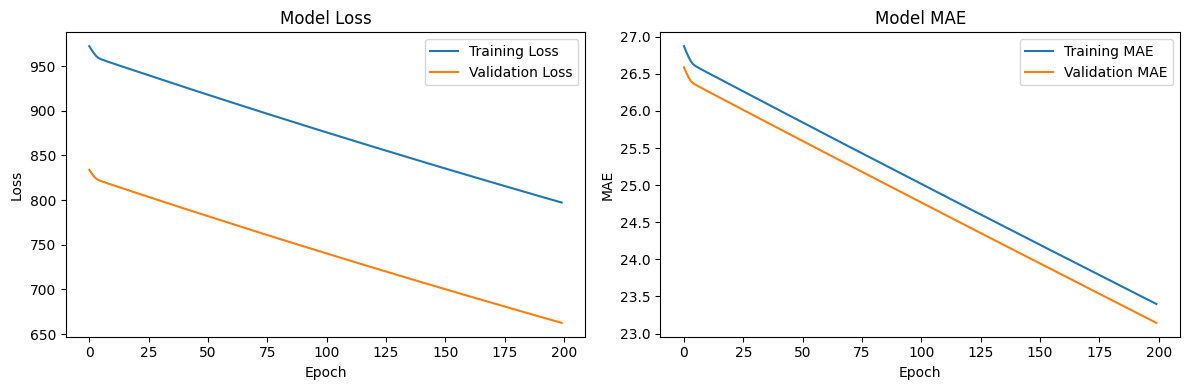

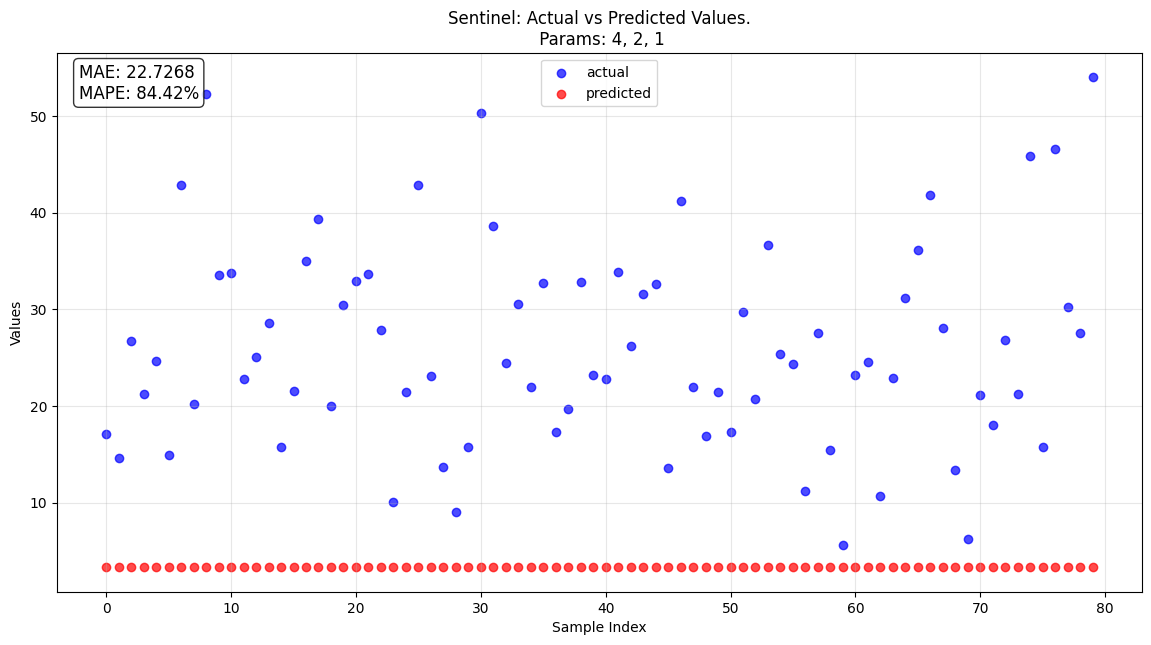

In [4]:
import tensorflow as tf
# Build the ANN model with non-linearity
model = tf.keras.Sequential([
    # Input layer
    tf.keras.Input(shape=(2, )),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(1)
])

ANNExperimentsV1(sentinel, features=['VH', 'VV'], satellite='Sentinel').run_experiment(model, optimizer='adam', epochs=200, batch_size=32, 
                                                                             verbose=0, model_param_string='4, 2, 1')

Training set: 537 samples
Validation set: 179 samples
Test set: 80 samples

Test Loss (MSE): 626.7590
Test MAE: 22.7253
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/stepWARNING:tensorflow:6 out of the last 9 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x70825c5fd1c0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step

Additional Metrics:
MSE: 626.7590
R² Score: -4.6812
RMSE: 25.0352


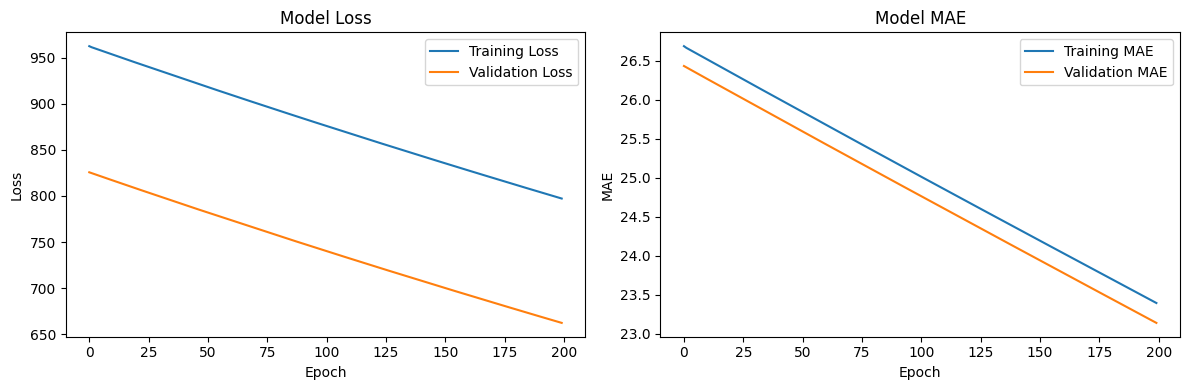

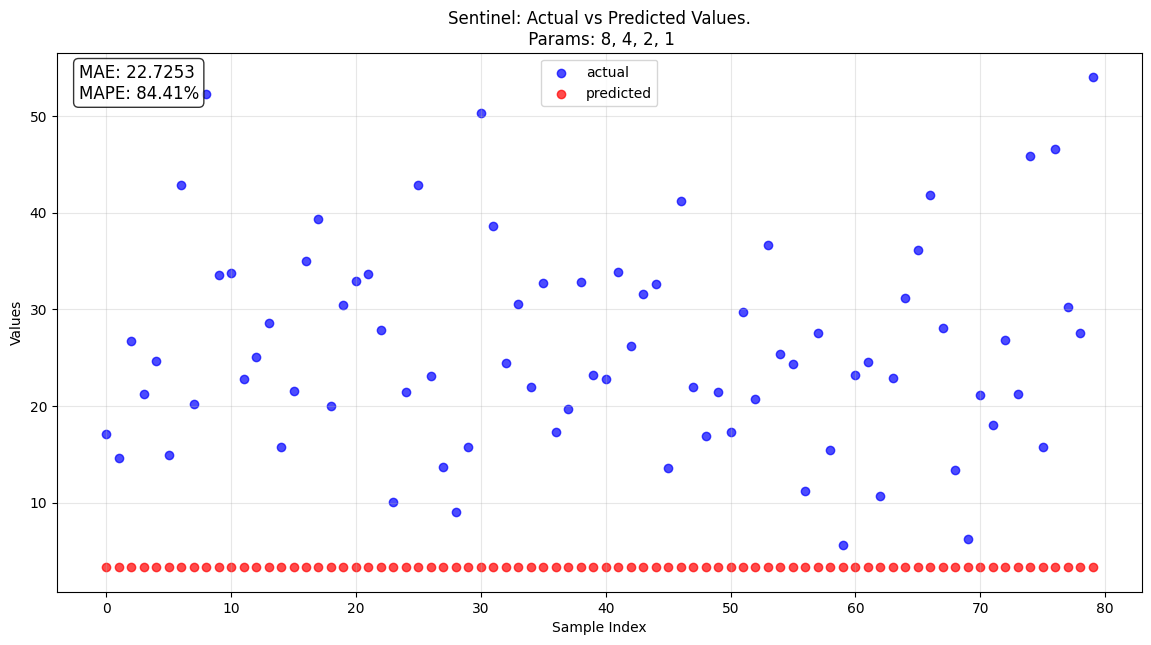

In [6]:
# Build the ANN model with non-linearity
model = tf.keras.Sequential([
    # Input layer
    tf.keras.Input(shape=(2, )),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(1)
])

ANNExperimentsV1(sentinel, features=['VH', 'VV'], satellite='Sentinel').run_experiment(model, optimizer='adam', epochs=200, batch_size=32, 
                                                                             verbose=0, model_param_string='8, 4, 2, 1')

In [7]:
combined = pd.read_excel('/home/kshipra/work/major/ml experiments/data/manually_combined.xlsx', sheet_name='eos_sent_combined')

combined = combined[combined['SM (Combined)'] < 150]

combined

,VH,VV,Angle,SM (Sent),HH,HV,SM (EOS),SM (Combined),Unnamed: 8,Latitude (S),Longitude (S),Latitude (E),Longitude (E),Lat Diff,Long Diff,SM Diff
0,-14.947200,-10.379400,40.366800,20.6,-7.38713,-15.09099,24.4,22.50,NaN,22.526048,72.765011,22.526048,72.765011,0.000000,0.000000,-3.8
1,-16.361200,-11.299400,41.008800,25.8,-6.25740,-12.05392,41.0,33.40,NaN,22.525481,72.765028,22.525481,72.765028,0.000000,0.000000,-15.2
2,-16.168800,-10.992000,42.359800,28.9,-8.44134,-16.46069,25.3,27.10,NaN,22.525423,72.765663,22.525423,72.765663,0.000000,0.000000,3.6
3,-15.630700,-8.829090,42.982700,4.1,-2.85467,-17.00499,53.7,28.90,NaN,22.525999,72.765663,22.525999,72.765663,0.000000,0.000000,-49.6
4,-15.130900,-10.333000,41.434700,35.3,-6.88868,-12.32378,53.4,44.35,NaN,22.525563,72.765399,22.525563,72.765399,0.000000,0.000000,-18.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,-15.603123,-10.557852,42.709682,30.2,-8.69274,-14.15688,26.8,28.50,NaN,22.505581,72.764064,22.523640,72.766727,-0.018059,-0.002663,3.4
743,-16.321512,-11.300431,42.176147,38.3,-6.48271,-15.56076,32.8,35.55,NaN,22.505961,72.764083,22.523657,72.766016,-0.017696,-0.001933,5.5
744,-15.585269,-11.489754,42.523727,20.0,-6.20660,-14.73141,34.8,27.40,NaN,22.506133,72.763434,22.524255,72.766024,-0.018122,-0.002590,-14.8
745,-16.052544,-10.954885,42.562408,39.7,-9.43414,-20.52987,27.8,33.75,NaN,22.505784,72.763859,22.524229,72.766601,-0.018445,-0.002742,11.9


In [8]:
X_cols = ['VH', 'VV', 'HH', 'HV', 'Angle']
y_col = ['SM (Combined)']

X = combined[X_cols]
y = combined[y_col]

In [11]:
combined[X_cols]

,VH,VV,HH,HV,Angle
0,-14.947200,-10.379400,-7.38713,-15.09099,40.366800
1,-16.361200,-11.299400,-6.25740,-12.05392,41.008800
2,-16.168800,-10.992000,-8.44134,-16.46069,42.359800
3,-15.630700,-8.829090,-2.85467,-17.00499,42.982700
4,-15.130900,-10.333000,-6.88868,-12.32378,41.434700
...,...,...,...,...,...
742,-15.603123,-10.557852,-8.69274,-14.15688,42.709682
743,-16.321512,-11.300431,-6.48271,-15.56076,42.176147
744,-15.585269,-11.489754,-6.20660,-14.73141,42.523727
745,-16.052544,-10.954885,-9.43414,-20.52987,42.562408


Training set: 502 samples
Validation set: 168 samples
Test set: 75 samples

Test Loss (MSE): 66.3236
Test MAE: 6.5419
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

Additional Metrics:
MSE: 66.3236
R² Score: -0.3104
RMSE: 8.1439


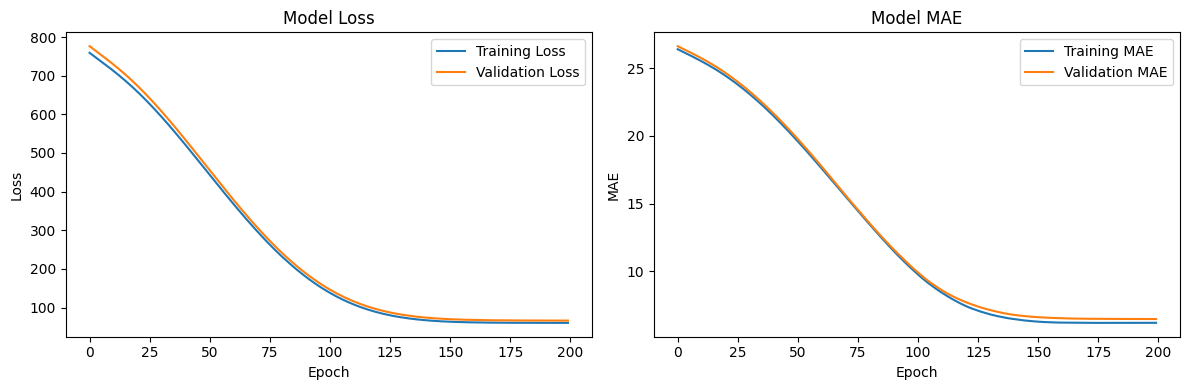

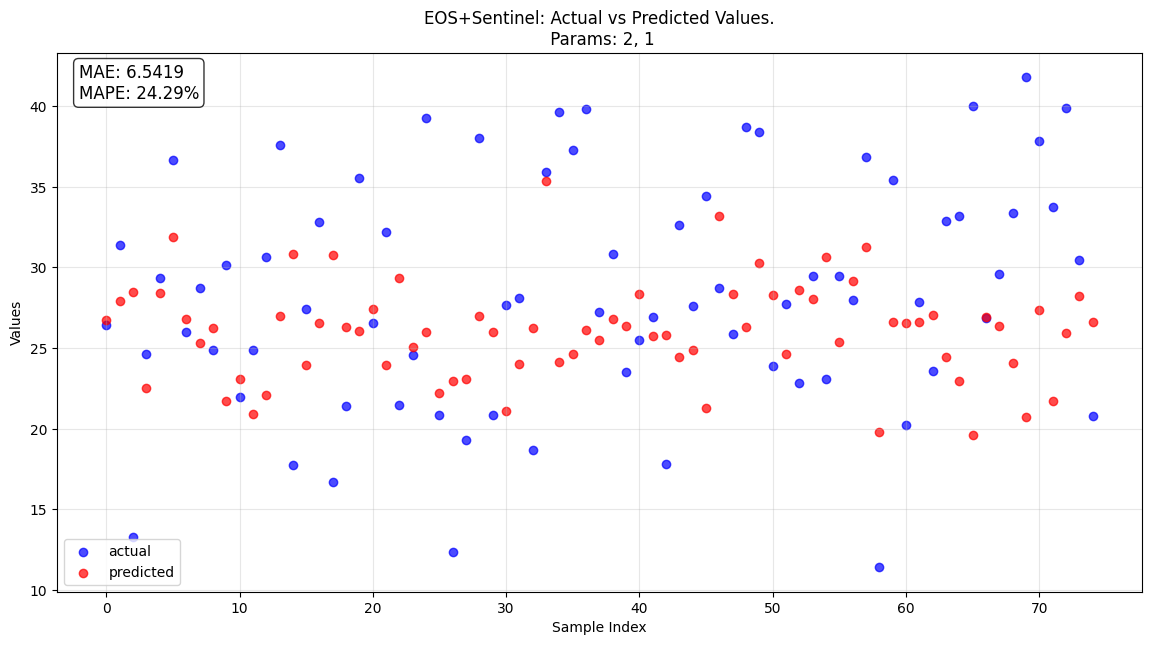

In [13]:
# Build the ANN model with non-linearity
model = tf.keras.Sequential([
    # Input layer
    tf.keras.Input(shape=(5, )),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(1)
])

ANNExperimentsV1(combined, features=X_cols, target=y_col[0], satellite='EOS+Sentinel').run_experiment(model, optimizer='adam', epochs=200, batch_size=32, 
                                                                             verbose=0, model_param_string='2, 1')

Training set: 502 samples
Validation set: 168 samples
Test set: 75 samples

Test Loss (MSE): 695.3620
Test MAE: 25.3915
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

Additional Metrics:
MSE: 695.3620
R² Score: -12.7385
RMSE: 26.3697


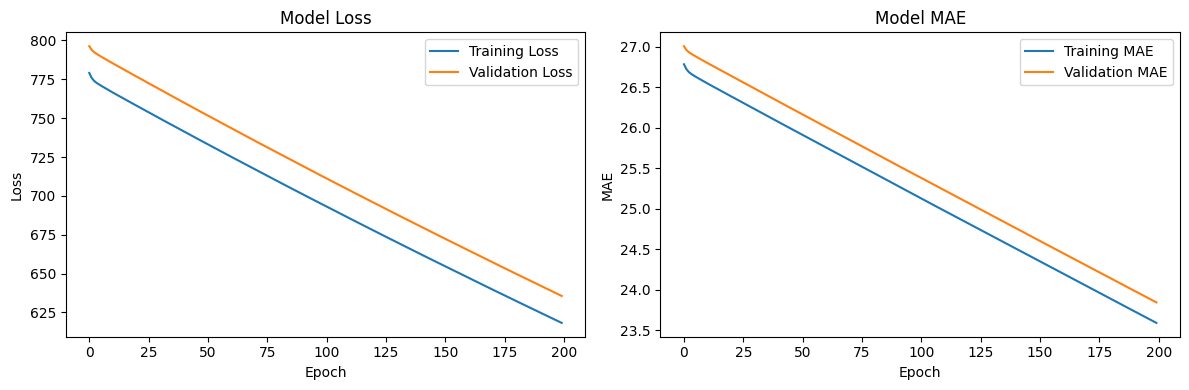

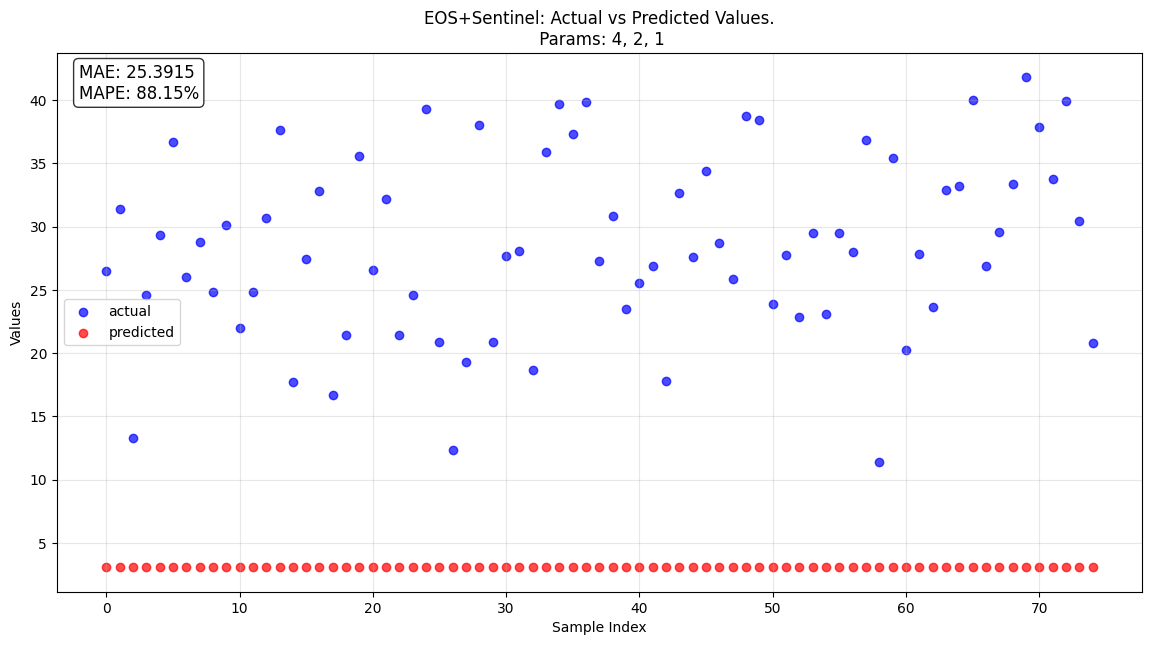

In [14]:
# Build the ANN model with non-linearity
model = tf.keras.Sequential([
    # Input layer
    tf.keras.Input(shape=(5, )),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(1)
])

ANNExperimentsV1(combined, features=X_cols, target=y_col[0], satellite='EOS+Sentinel').run_experiment(model, optimizer='adam', epochs=200, batch_size=32, 
                                                                             verbose=0, model_param_string='4, 2, 1')

Training set: 502 samples
Validation set: 168 samples
Test set: 75 samples

Test Loss (MSE): 66.5923
Test MAE: 6.5802
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

Additional Metrics:
MSE: 66.5923
R² Score: -0.3157
RMSE: 8.1604


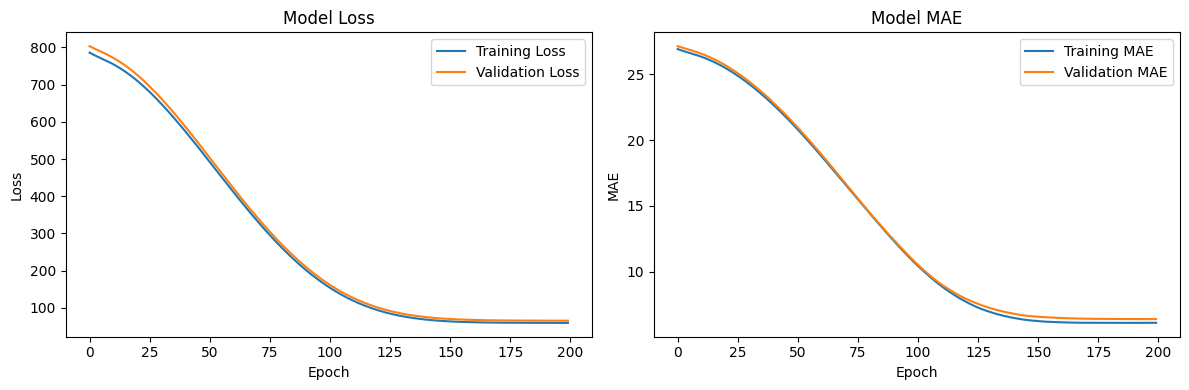

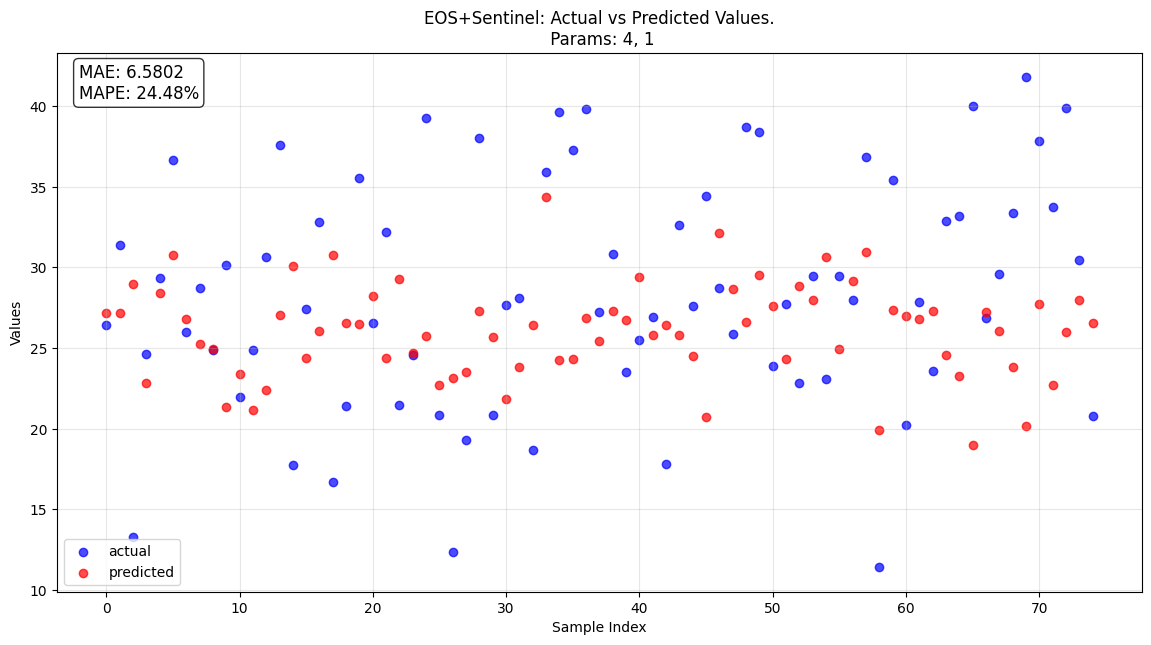

In [15]:
# Build the ANN model with non-linearity
model = tf.keras.Sequential([
    # Input layer
    tf.keras.Input(shape=(5, )),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)
])

ANNExperimentsV1(combined, features=X_cols, target=y_col[0], satellite='EOS+Sentinel').run_experiment(model, optimizer='adam', epochs=200, batch_size=32, 
                                                                             verbose=0, model_param_string='4, 1')

Training set: 502 samples
Validation set: 168 samples
Test set: 75 samples

Test Loss (MSE): 695.3068
Test MAE: 25.3907
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

Additional Metrics:
MSE: 695.3068
R² Score: -12.7374
RMSE: 26.3687


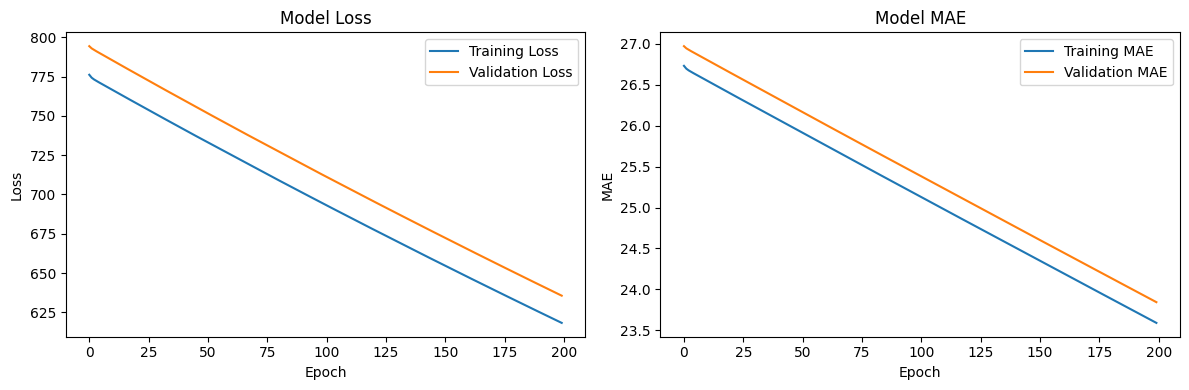

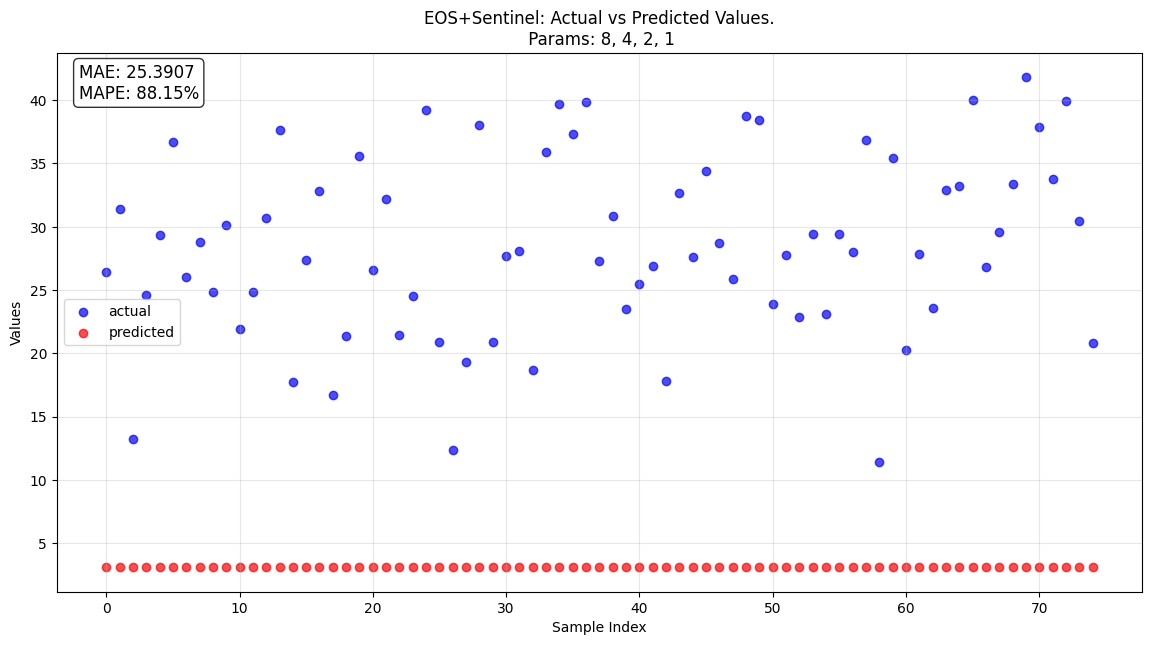

In [16]:
# Build the ANN model with non-linearity
model = tf.keras.Sequential([
    # Input layer
    tf.keras.Input(shape=(5, )),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(1)
])

ANNExperimentsV1(combined, features=X_cols, target=y_col[0], satellite='EOS+Sentinel').run_experiment(model, optimizer='adam', epochs=200, batch_size=32, 
                                                                             verbose=0, model_param_string='8, 4, 2, 1')